# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [87]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

In [89]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("KoreaSummit_Moon.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

존경하는 신사, 숙녀와 동지 그리고 친구 여러분.

오늘 우리 모두는 이 자리에서 우리나라와 전 세계의 보다 나은 발전을 축하하고 새로운 자유국가 탄생에 대한 영광과 희망을 주기 위해 모였습니다.

저는 오랫동안 이어져 왔던 인류의 끔찍한 고통과 경험을 통해 모든 인류가 자랑스러워 할 수 있는 사회가 필요하다는 것을 깨달았습니다.

남아프리카 공화국의 국민으로서 하루 일과를 통해 우리는 반드시 정의 안에서 인권존중에 대한 생각을 복원해야 되고, 고귀한 인간의 영혼 안에서 자부심을 길러야 하며 우리 모두의 영광스러운 삶을 위해 우리의 희망은 지속돼야 할 것입니다.

이 자리를 빌려 이 광경을 보고 계시는 전 세계의 모든 분과 이 자리에 참석하신 모든 분께 다시 한 번 감사를 드립니다.

또한 저는 우리 동포 모두에게 프리토리아의 자카란다 나무와 총림지대의 함수초로 유명한 우리나라의 절친한 국민이 되셨다는 것을 주저 없이 말하겠습니다.

우리 국민 중 하나가 조국의 흙을 만지고 느낄 때마다 우리는 한 국민의 새로운 시작을 느낄 것입니다. 국가의 분위기는 계절의 변화처럼 바뀌어야 합니다.

우리는 잔디들이 푸르러지고 꽃이 피는 이때 기쁨과 흥분에 겨워 살아갑니다. 그리고 그 기쁨과 흥분은 참혹한 마찰로 인해 갈라져 버린 조국, 인종차별과 그 외 유해한 여러 가지 이론 때문에 버려지고 법에 방치되어 소외된 사람들과 공존해 왔던 우리를 설명해줍니다.

남아프리카공화국의 국민들은 얼마 전 박탈당했던 우리의 인간 존엄성이 오늘날 우리의 가슴 속 깊은 곳에 우리가 조국의 주인이라는 사실을 깨닫게 해준 것에 대해 만족스러워 할 것입니다.

저희는 하나의 일반적인 정의, 평화와 인간 존엄성의 승리의 자리에 우리국민과 같이 해주신 전 세계에서 오신 모든 고명한 인사께 경의를 표합니다.

저희는 이 광경을 지켜보고 계시는 모든 분이 계속 우리나라의 평화, 번영, 반 성적차별, 반 인종차별 그리고 민주주의 정착을 도와주시리라 믿고 있습니다.

저희는 국민과 민주정당, 종교, 여자, 

In [90]:
# 연설문2
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("KoreaSummit_Kim.txt", 'r', encoding='euc-kr')
message_of_kim = f.read()
print(message_of_kim)
f.close()

오늘 저는 여러분께 말씀드립니다. 우리가 처한 도전들은 현실이고, 심각할 뿐만 아니라, 또한 매우 많다는 것을 말입니다. 그 도전들은 쉽게 또는 짧은 기간에 해결되지는 않을 것이지만 이것만은 알아두십시오. 우리는 결국 해낼 것입니다.
오늘 우리는, 두려움보다는 희망을 선택했고, 갈등과 불화보다는 목적을 위한 단결을 선택했기 때문에 여기 모였습니다.
오늘 우리는, 우리의 정치를 오랫동안 옥죄어왔던 사소한 불만들과 거짓 공약들, 상호비방과 낡은 독단론들에 종식을 선언하기 위해 여기에 왔습니다. 
미국은 여전히 젊은 나라지만 이제는 성서의 말씀대로 유치함을 버릴 때가 왔습니다.
우리의 인내심을 다시 확인할 때가, 더 나은 역사를 선택할 때가, 세대를 지나면서 물려받은 소중한 선물인 고귀한 이상을 계속 앞으로 넘겨줄 때가 왔습니다. 즉 만인은 평등하고 자유로우며 또한 모두 충분한 행복을 추구할 기회를 가질 자격이 있다는 천부의 약속 말입니다.
미국의 위대함을 다시금 확인하면서 우리는 그 위대함이 결코 저절로 주어진 것이 아니라는 사실을 압니다. 우리의 여정은 결코 지름길이나 작은 성과에 안주하는 길들 중의 하나를 걸어온 것이 아니었습니다. 그 길은 결코 일보다는 여가를 선호하거나 부와 명예의 기쁨만을 추구하는 소심한 자들의 길이 아니었습니다. 오히려 그 길은 위험을 무릅쓰는 이들, 실천하는 이들, 무언가를 만들어 내는 이들의 길이었습니다. 그들 중 몇몇은 유명했지만 대부분은 자신들의 분야에서 드러나지 않은 채 묵묵히 자유와 번영을 위한 길고 험난한 길을 우리와 함께 걸었습니다.
우리를 위해, 그들은 자신들의 얼마 안되는 전재산을 꾸려 새 인생을 찾아 대양을 건넜습니다. 우리를 위해, 그들은 공장에서 힘들게 일하고 서부에 정착해서 채찍질을 감내하며 황야를 일궜습니다.
우리를 위해, 그들은 싸웠고 또 콩코드와 게티스버그, 노르망디와 베트남의 케산 같은 곳에서 목숨을 바쳤습니다. 우리가 더 나은 삶을 살 수 있도록 몇 번이고 되풀이 해서 이런 분들은 자신들의 손의 살갗이 

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [91]:
# 연설문 1번 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['존경하는 신사, 숙녀와 동지 그리고 친구 여러분.',
 '오늘 우리 모두는 이 자리에서 우리나라와 전 세계의 보다 나은 발전을 축하하고 새로운 자유국가 탄생에 대한 영광과 희망을 주기 위해 모였습니다.',
 '저는 오랫동안 이어져 왔던 인류의 끔찍한 고통과 경험을 통해 모든 인류가 자랑스러워 할 수 있는 사회가 필요하다는 것을 깨달았습니다.',
 '남아프리카 공화국의 국민으로서 하루 일과를 통해 우리는 반드시 정의 안에서 인권존중에 대한 생각을 복원해야 되고, 고귀한 인간의 영혼 안에서 자부심을 길러야 하며 우리 모두의 영광스러운 삶을 위해 우리의 희망은 지속돼야 할 것입니다.',
 '이 자리를 빌려 이 광경을 보고 계시는 전 세계의 모든 분과 이 자리에 참석하신 모든 분께 다시 한 번 감사를 드립니다.',
 '또한 저는 우리 동포 모두에게 프리토리아의 자카란다 나무와 총림지대의 함수초로 유명한 우리나라의 절친한 국민이 되셨다는 것을 주저 없이 말하겠습니다.',
 '우리 국민 중 하나가 조국의 흙을 만지고 느낄 때마다 우리는 한 국민의 새로운 시작을 느낄 것입니다. 국가의 분위기는 계절의 변화처럼 바뀌어야 합니다.',
 '우리는 잔디들이 푸르러지고 꽃이 피는 이때 기쁨과 흥분에 겨워 살아갑니다. 그리고 그 기쁨과 흥분은 참혹한 마찰로 인해 갈라져 버린 조국, 인종차별과 그 외 유해한 여러 가지 이론 때문에 버려지고 법에 방치되어 소외된 사람들과 공존해 왔던 우리를 설명해줍니다.',
 '남아프리카공화국의 국민들은 얼마 전 박탈당했던 우리의 인간 존엄성이 오늘날 우리의 가슴 속 깊은 곳에 우리가 조국의 주인이라는 사실을 깨닫게 해준 것에 대해 만족스러워 할 것입니다.',
 '저희는 하나의 일반적인 정의, 평화와 인간 존엄성의 승리의 자리에 우리국민과 같이 해주신 전 세계에서 오신 모든 고명한 인사께 경의를 표합니다.',
 '저희는 이 광경을 지켜보고 계시는 모든 분이 계속 우리나라의 평화, 번영, 반 성적차별, 반 인종차별 그리고 민주주의 정착을 도와주시리라 

In [92]:
# 연설문 2번 전처리
message_of_kim = message_of_kim.split('\n\n')
message_of_kim

['오늘 저는 여러분께 말씀드립니다. 우리가 처한 도전들은 현실이고, 심각할 뿐만 아니라, 또한 매우 많다는 것을 말입니다. 그 도전들은 쉽게 또는 짧은 기간에 해결되지는 않을 것이지만 이것만은 알아두십시오. 우리는 결국 해낼 것입니다.\n오늘 우리는, 두려움보다는 희망을 선택했고, 갈등과 불화보다는 목적을 위한 단결을 선택했기 때문에 여기 모였습니다.\n오늘 우리는, 우리의 정치를 오랫동안 옥죄어왔던 사소한 불만들과 거짓 공약들, 상호비방과 낡은 독단론들에 종식을 선언하기 위해 여기에 왔습니다. \n미국은 여전히 젊은 나라지만 이제는 성서의 말씀대로 유치함을 버릴 때가 왔습니다.\n우리의 인내심을 다시 확인할 때가, 더 나은 역사를 선택할 때가, 세대를 지나면서 물려받은 소중한 선물인 고귀한 이상을 계속 앞으로 넘겨줄 때가 왔습니다. 즉 만인은 평등하고 자유로우며 또한 모두 충분한 행복을 추구할 기회를 가질 자격이 있다는 천부의 약속 말입니다.\n미국의 위대함을 다시금 확인하면서 우리는 그 위대함이 결코 저절로 주어진 것이 아니라는 사실을 압니다. 우리의 여정은 결코 지름길이나 작은 성과에 안주하는 길들 중의 하나를 걸어온 것이 아니었습니다. 그 길은 결코 일보다는 여가를 선호하거나 부와 명예의 기쁨만을 추구하는 소심한 자들의 길이 아니었습니다. 오히려 그 길은 위험을 무릅쓰는 이들, 실천하는 이들, 무언가를 만들어 내는 이들의 길이었습니다. 그들 중 몇몇은 유명했지만 대부분은 자신들의 분야에서 드러나지 않은 채 묵묵히 자유와 번영을 위한 길고 험난한 길을 우리와 함께 걸었습니다.\n우리를 위해, 그들은 자신들의 얼마 안되는 전재산을 꾸려 새 인생을 찾아 대양을 건넜습니다. 우리를 위해, 그들은 공장에서 힘들게 일하고 서부에 정착해서 채찍질을 감내하며 황야를 일궜습니다.\n우리를 위해, 그들은 싸웠고 또 콩코드와 게티스버그, 노르망디와 베트남의 케산 같은 곳에서 목숨을 바쳤습니다. 우리가 더 나은 삶을 살 수 있도록 몇 번이고 되풀이 해서 이런 분들은 자신들

In [93]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<28x365 sparse matrix of type '<class 'numpy.int64'>'
	with 481 stored elements in Compressed Sparse Row format>

In [94]:
# 연설문 2번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(message_of_kim)
tf_bow2 = tf_vectorizer.fit_transform(message_of_kim)
tf_bow2

<1x1092 sparse matrix of type '<class 'numpy.int64'>'
	with 1092 stored elements in Compressed Sparse Row format>

In [95]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

365
365


['gdp',
 '가깝게',
 '가난한',
 '가동할',
 '가득찬',
 '가르고',
 '가장',
 '가족들로',
 '가지고',
 '가지만을',
 '가진',
 '가질',
 '각국들의',
 '각종',
 '간주하고',
 '갈등과',
 '감내하며',
 '감내할',
 '감사하며',
 '감사합니다',
 '감시의',
 '강가의',
 '강력한',
 '강력해서',
 '강점이라는',
 '강하고',
 '강한',
 '같은',
 '개인들의',
 '개척해',
 '개혁하고',
 '개혁할',
 '거대한',
 '거부할',
 '거절했다고',
 '거짓',
 '거치면서',
 '건국되는',
 '건국의',
 '건넜습니다',
 '건설한',
 '건설할',
 '걸어가고',
 '걸어온',
 '걸었습니다',
 '겁니다',
 '것들입니다',
 '것보다',
 '것은',
 '것을',
 '것이',
 '것이고',
 '것이라고',
 '것이라기보다는',
 '것이라는',
 '것이며',
 '것이지만',
 '것입니다',
 '것입니다만',
 '게티스버그',
 '겨울에도',
 '견고한',
 '견딥시다',
 '결과에',
 '결국',
 '결단입니다',
 '결정들을',
 '결정할',
 '결코',
 '결합했을',
 '겸손과',
 '경의를',
 '경제',
 '경제의',
 '경험이',
 '계단에',
 '계속',
 '계획들을',
 '고귀한',
 '고려',
 '고수하는데',
 '고집하거나',
 '고통에',
 '골고루',
 '곳곳에서',
 '곳과',
 '곳에서',
 '곳에서는',
 '곳을',
 '공공자금을',
 '공동의',
 '공산주의를',
 '공약들',
 '공장에서',
 '공장을',
 '공정성',
 '공통된',
 '과거의',
 '과학을',
 '관리하는',
 '관한',
 '관해서',
 '교량',
 '구절들을',
 '국가입니다',
 '국경',
 '국내총생산',
 '국립묘지에',
 '국민과',
 '국민들께',
 '국민들에게',
 '국민들은',
 '국민들의',
 '굳건히',
 '굶주린',
 '궁극적으로',
 '권한을',
 '규모에',
 '규정지을'

In [96]:
# 연설문 2
# check vocabulary in TDM
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_vectorizer.get_feature_names()

1092
1092


['gdp',
 '가깝게',
 '가난한',
 '가동할',
 '가득찬',
 '가르고',
 '가장',
 '가족들로',
 '가지고',
 '가지만을',
 '가진',
 '가질',
 '각국들의',
 '각종',
 '간주하고',
 '갈등과',
 '감내하며',
 '감내할',
 '감사하며',
 '감사합니다',
 '감시의',
 '강가의',
 '강력한',
 '강력해서',
 '강점이라는',
 '강하고',
 '강한',
 '같은',
 '개인들의',
 '개척해',
 '개혁하고',
 '개혁할',
 '거대한',
 '거부할',
 '거절했다고',
 '거짓',
 '거치면서',
 '건국되는',
 '건국의',
 '건넜습니다',
 '건설한',
 '건설할',
 '걸어가고',
 '걸어온',
 '걸었습니다',
 '겁니다',
 '것들입니다',
 '것보다',
 '것은',
 '것을',
 '것이',
 '것이고',
 '것이라고',
 '것이라기보다는',
 '것이라는',
 '것이며',
 '것이지만',
 '것입니다',
 '것입니다만',
 '게티스버그',
 '겨울에도',
 '견고한',
 '견딥시다',
 '결과에',
 '결국',
 '결단입니다',
 '결정들을',
 '결정할',
 '결코',
 '결합했을',
 '겸손과',
 '경의를',
 '경제',
 '경제의',
 '경험이',
 '계단에',
 '계속',
 '계획들을',
 '고귀한',
 '고려',
 '고수하는데',
 '고집하거나',
 '고통에',
 '골고루',
 '곳곳에서',
 '곳과',
 '곳에서',
 '곳에서는',
 '곳을',
 '공공자금을',
 '공동의',
 '공산주의를',
 '공약들',
 '공장에서',
 '공장을',
 '공정성',
 '공통된',
 '과거의',
 '과학을',
 '관리하는',
 '관한',
 '관해서',
 '교량',
 '구절들을',
 '국가입니다',
 '국경',
 '국내총생산',
 '국립묘지에',
 '국민과',
 '국민들께',
 '국민들에게',
 '국민들은',
 '국민들의',
 '굳건히',
 '굶주린',
 '궁극적으로',
 '권한을',
 '규모에',
 '규정지을'

In [97]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['de', 'klerk에게도', '가난', '가슴', '가지', '각자의', '갈라놓은', '갈라져', '감사를', '감옥에서', '같은', '같이', '거부하는', '걷을', '것에', '것을', '것의', '것입니다', '겨워', '결론을', '결코', '경의를', '경험을', '계곡에서', '계속', '계시는', '계절의', '고귀한', '고명한', '고통', '고통과', '곳에', '공간들을', '공존해', '공화국', '공화국의', '과정을', '광경을', '구금되어', '국가', '국가의', '국민', '국민과', '국민들은', '국민들이', '국민으로서', '국민의', '국민이', '굶주린', '그들', '그들의', '그러나', '그러므로', '그리고', '기쁨과', '길러야', '길이', '깊은', '깨닫게', '깨달았습니다', '꽃이', '꿈은', '끔찍한', '나라', '나라를', '나라의', '나무와', '나은', '남녀차별의', '남아프리카', '남아프리카공화국의', '남에게', '내디뎠습니다', '내려드리겠습니다', '내려주게', '노력의', '노력하겠습니다', '놓을', '느낄', '다른', '다리를', '다시', '다시는', '다짐', '당당히', '대가입니다', '대통령을', '대한', '대해', '도와주시리라', '동지', '동포', '되고', '되셨다는', '두려움', '드립니다', '들어오길', '때마다', '때문에', '또한', '리더들이', '마지막', '마찰로', '마침내', '만들겠다는', '만족스러워', '만지고', '많은', '말하겠습니다', '명의', '모두가', '모두는', '모두를', '모두에게', '모두의', '모든', '모였습니다', '모욕하는', '뭉쳐', '미약하기도', '민주적', '민주적인', '민주정당', '민주주의', '믿고', '바뀌어야', '바칩니다', '박탈당했던', '반드시', '발걸음을', '발전을', '방위군에게', '방치되어', '백인과', '버려지고', '버린', '번영', '번째

array([ 1,  1,  1,  3,  2,  1,  1,  1,  4,  1,  1,  1,  1,  1,  2,  4,  1,
        3,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  5,  2,  1,  1,  4,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  3,  1,  2, 10,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  4,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  2,  1,  1,  1,
        1,  1,  3,  2,  1,  1,  1,  3,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  1

In [98]:
# 연설문 2
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2

['gdp', '가깝게', '가난한', '가동할', '가득찬', '가르고', '가장', '가족들로', '가지고', '가지만을', '가진', '가질', '각국들의', '각종', '간주하고', '갈등과', '감내하며', '감내할', '감사하며', '감사합니다', '감시의', '강가의', '강력한', '강력해서', '강점이라는', '강하고', '강한', '같은', '개인들의', '개척해', '개혁하고', '개혁할', '거대한', '거부할', '거절했다고', '거짓', '거치면서', '건국되는', '건국의', '건넜습니다', '건설한', '건설할', '걸어가고', '걸어온', '걸었습니다', '겁니다', '것들입니다', '것보다', '것은', '것을', '것이', '것이고', '것이라고', '것이라기보다는', '것이라는', '것이며', '것이지만', '것입니다', '것입니다만', '게티스버그', '겨울에도', '견고한', '견딥시다', '결과에', '결국', '결단입니다', '결정들을', '결정할', '결코', '결합했을', '겸손과', '경의를', '경제', '경제의', '경험이', '계단에', '계속', '계획들을', '고귀한', '고려', '고수하는데', '고집하거나', '고통에', '골고루', '곳곳에서', '곳과', '곳에서', '곳에서는', '곳을', '공공자금을', '공동의', '공산주의를', '공약들', '공장에서', '공장을', '공정성', '공통된', '과거의', '과학을', '관리하는', '관한', '관해서', '교량', '구절들을', '국가입니다', '국경', '국내총생산', '국립묘지에', '국민과', '국민들께', '국민들에게', '국민들은', '국민들의', '굳건히', '굶주린', '궁극적으로', '권한을', '규모에', '규정지을', '그것들을', '그들', '그들보다', '그들에게', '그들은', '그들을', '그들이', '그때', '그러나', '그러한', '그런', '그런데', '그럴', '그럼에도', '그렇게', '그렇기', '그릇된

array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

In [99]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'de': 1,
 'klerk에게도': 1,
 '가난': 1,
 '가슴': 3,
 '가지': 2,
 '각자의': 1,
 '갈라놓은': 1,
 '갈라져': 1,
 '감사를': 4,
 '감옥에서': 1,
 '같은': 1,
 '같이': 1,
 '거부하는': 1,
 '걷을': 1,
 '것에': 2,
 '것을': 4,
 '것의': 1,
 '것입니다': 3,
 '겨워': 1,
 '결론을': 1,
 '결코': 2,
 '경의를': 1,
 '경험을': 1,
 '계곡에서': 1,
 '계속': 1,
 '계시는': 2,
 '계절의': 1,
 '고귀한': 1,
 '고명한': 1,
 '고통': 1,
 '고통과': 1,
 '곳에': 1,
 '공간들을': 1,
 '공존해': 1,
 '공화국': 1,
 '공화국의': 2,
 '과정을': 1,
 '광경을': 2,
 '구금되어': 1,
 '국가': 1,
 '국가의': 2,
 '국민': 1,
 '국민과': 1,
 '국민들은': 1,
 '국민들이': 1,
 '국민으로서': 1,
 '국민의': 1,
 '국민이': 1,
 '굶주린': 1,
 '그들': 1,
 '그들의': 2,
 '그러나': 1,
 '그러므로': 1,
 '그리고': 5,
 '기쁨과': 2,
 '길러야': 1,
 '길이': 1,
 '깊은': 4,
 '깨닫게': 2,
 '깨달았습니다': 1,
 '꽃이': 1,
 '꿈은': 1,
 '끔찍한': 1,
 '나라': 1,
 '나라를': 1,
 '나라의': 1,
 '나무와': 1,
 '나은': 1,
 '남녀차별의': 1,
 '남아프리카': 3,
 '남아프리카공화국의': 1,
 '남에게': 1,
 '내디뎠습니다': 1,
 '내려드리겠습니다': 1,
 '내려주게': 1,
 '노력의': 1,
 '노력하겠습니다': 1,
 '놓을': 1,
 '느낄': 2,
 '다른': 3,
 '다리를': 1,
 '다시': 1,
 '다시는': 1,
 '다짐': 1,
 '당당히': 1,
 '대가입니다': 1,
 '대통령을': 1,
 '대한': 2,
 '대해': 2,
 '도와주

In [100]:
# 연설문 2
# 단어별 글자수 확인
tf_word_dict2

{'gdp': 1,
 '가깝게': 1,
 '가난한': 1,
 '가동할': 1,
 '가득찬': 1,
 '가르고': 1,
 '가장': 6,
 '가족들로': 1,
 '가지고': 1,
 '가지만을': 1,
 '가진': 2,
 '가질': 1,
 '각국들의': 1,
 '각종': 1,
 '간주하고': 1,
 '갈등과': 1,
 '감내하며': 1,
 '감내할': 1,
 '감사하며': 1,
 '감사합니다': 1,
 '감시의': 1,
 '강가의': 1,
 '강력한': 1,
 '강력해서': 1,
 '강점이라는': 1,
 '강하고': 1,
 '강한': 1,
 '같은': 3,
 '개인들의': 1,
 '개척해': 1,
 '개혁하고': 1,
 '개혁할': 1,
 '거대한': 1,
 '거부할': 1,
 '거절했다고': 1,
 '거짓': 1,
 '거치면서': 1,
 '건국되는': 1,
 '건국의': 2,
 '건넜습니다': 1,
 '건설한': 1,
 '건설할': 1,
 '걸어가고': 1,
 '걸어온': 1,
 '걸었습니다': 1,
 '겁니다': 1,
 '것들입니다': 1,
 '것보다': 1,
 '것은': 3,
 '것을': 4,
 '것이': 7,
 '것이고': 1,
 '것이라고': 1,
 '것이라기보다는': 1,
 '것이라는': 6,
 '것이며': 2,
 '것이지만': 1,
 '것입니다': 27,
 '것입니다만': 1,
 '게티스버그': 1,
 '겨울에도': 1,
 '견고한': 1,
 '견딥시다': 1,
 '결과에': 2,
 '결국': 3,
 '결단입니다': 1,
 '결정들을': 1,
 '결정할': 1,
 '결코': 4,
 '결합했을': 2,
 '겸손과': 1,
 '경의를': 1,
 '경제': 1,
 '경제의': 2,
 '경험이': 1,
 '계단에': 1,
 '계속': 2,
 '계획들을': 1,
 '고귀한': 1,
 '고려': 1,
 '고수하는데': 1,
 '고집하거나': 1,
 '고통에': 1,
 '골고루': 1,
 '곳곳에서': 1,
 '곳과': 1,
 '곳에서': 1,
 '곳에서는': 1

### 시각화

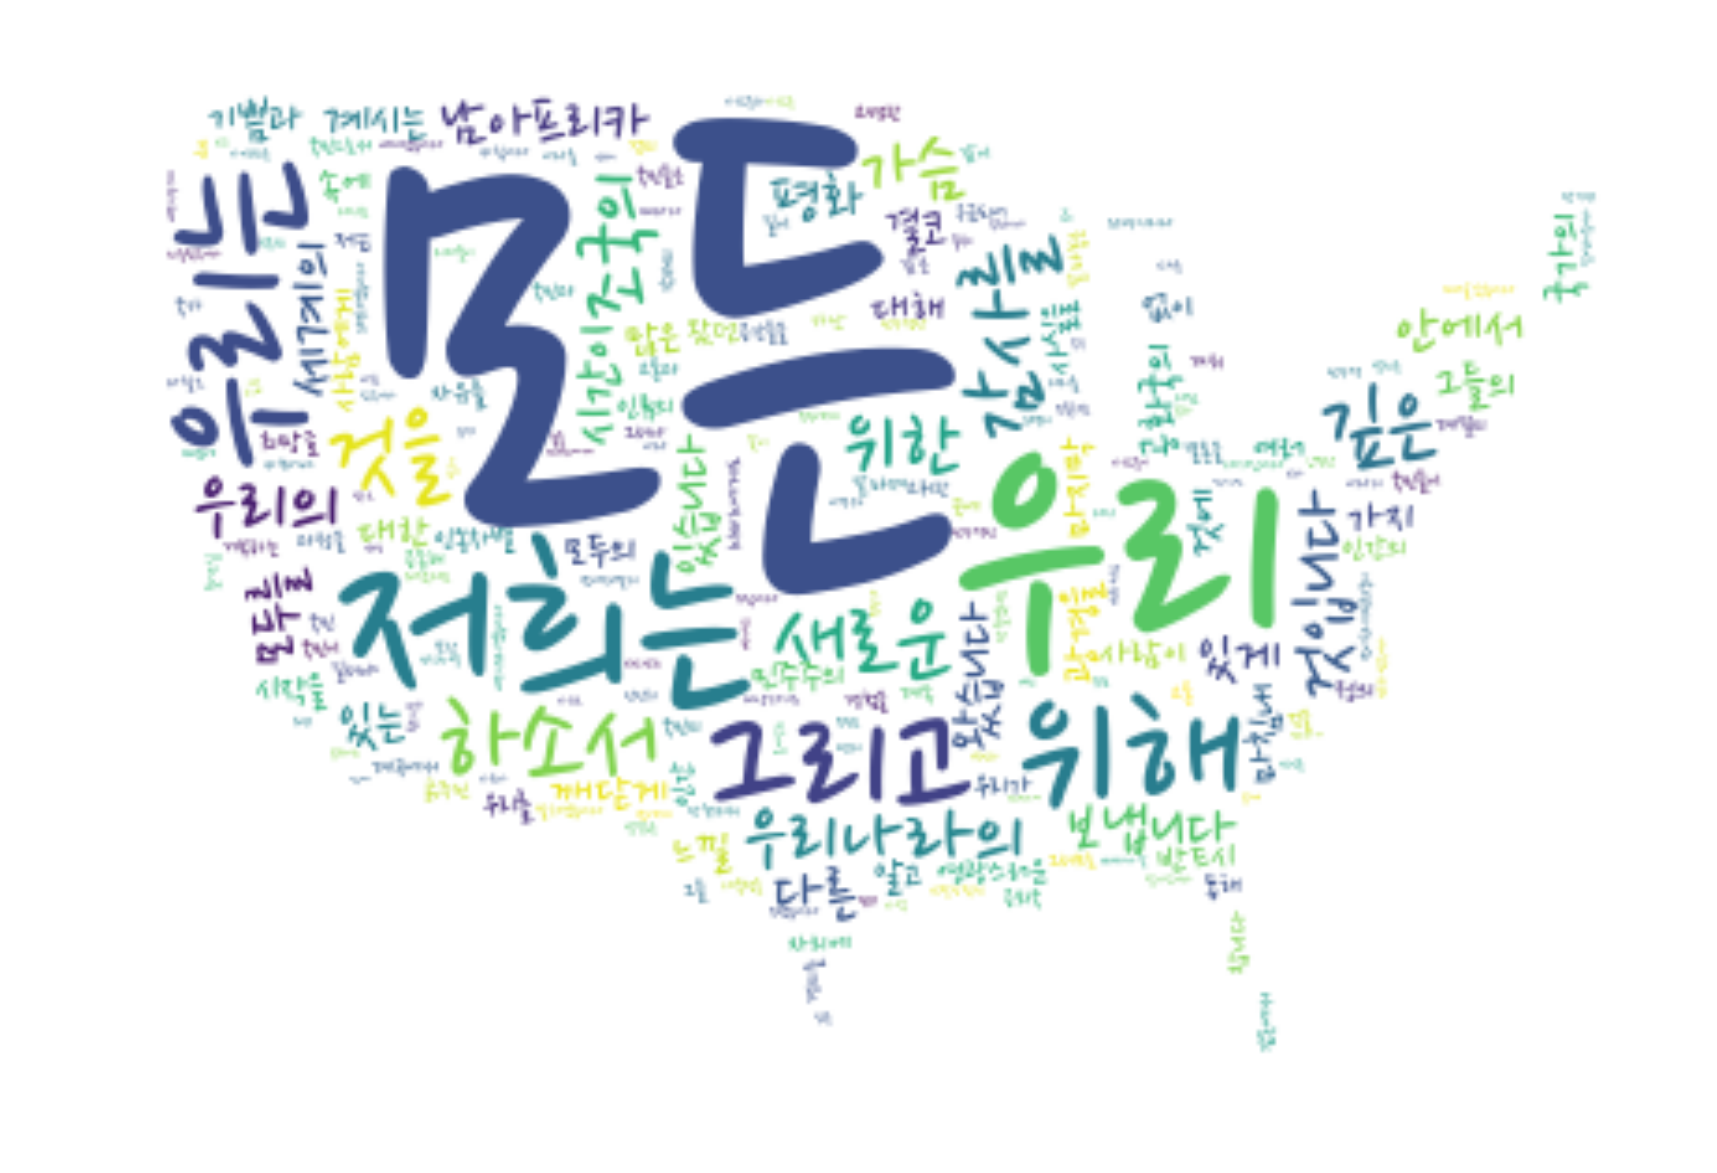

In [101]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기

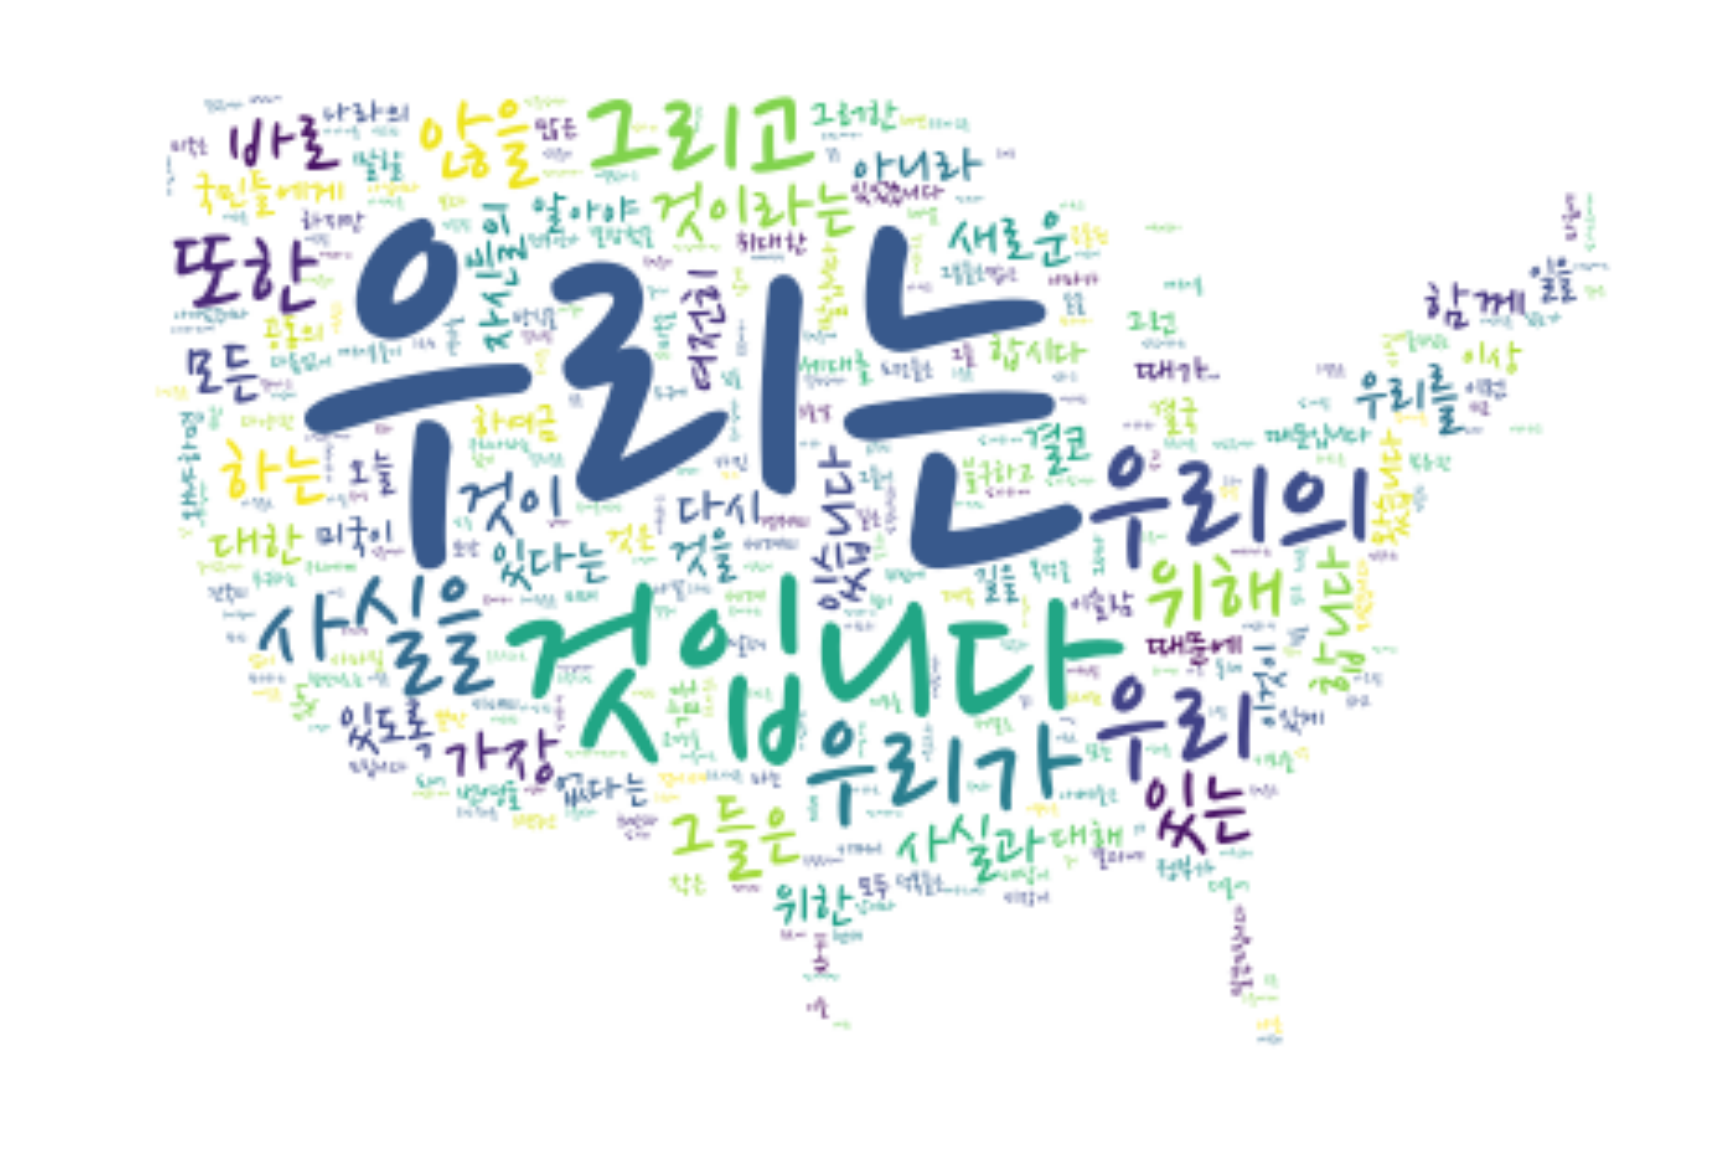

In [102]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("KimSpeech.png") # 그림파일로 추출하기